In [3]:
# Imports
from data_utils import prepare_data, prep_pca_data
from ml_utils import *
import matplotlib.pyplot as plt
import numpy as np

## Reading data

Using prepare_data to read, cleanup, and normalize data. After processing, there are 455 training data points and 114 testing data points.

In [4]:
TRAIN_DATA_LOC = './data/training_data.csv'
TEST_DATA_LOC = './data/testing_data.csv'

orig_train_features, train_labels, orig_test_features, test_labels = prepare_data(TRAIN_DATA_LOC, 
                                                                        TEST_DATA_LOC)

print(orig_train_features.shape, orig_test_features.shape)

(455, 30) (114, 30)


## Training ML models with original 30 features

In [5]:
train_features = orig_train_features
test_features = orig_test_features

lr_train_metrics, lr_test_metrics = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics, dt_test_metrics = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics, rf_test_metrics = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics, svm_test_metrics = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics, knn_test_metrics = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train Metrics: Acc={lr_train_metrics[0]}, P={lr_train_metrics[1]}, R={lr_train_metrics[2]}')
print(f'Test Metrics: Acc={lr_test_metrics[0]}, P={lr_test_metrics[1]}, R={lr_test_metrics[2]}')

print(f'\nDecision Tree:')
print(f'Train Metrics: Acc={dt_train_metrics[0]}, P={dt_train_metrics[1]}, R={dt_train_metrics[2]}')
print(f'Test Metrics: Acc={dt_test_metrics[0]}, P={dt_test_metrics[1]}, R={dt_test_metrics[2]}')

print(f'\nRandom Forest:')
print(f'Train Metrics: Acc={rf_train_metrics[0]}, P={rf_train_metrics[1]}, R={rf_train_metrics[2]}')
print(f'Test Metrics: Acc={rf_test_metrics[0]}, P={rf_test_metrics[1]}, R={rf_test_metrics[2]}')

print(f'\nSVM:')
print(f'Train Metrics: Acc={svm_train_metrics[0]}, P={svm_train_metrics[1]}, R={svm_train_metrics[2]}')
print(f'Test Metrics: Acc={svm_test_metrics[0]}, P={svm_test_metrics[1]}, R={svm_test_metrics[2]}')

print(f'\nKNN:')
print(f'Train Metrics: Acc={knn_train_metrics[0]}, P={knn_train_metrics[1]}, R={knn_train_metrics[2]}')
print(f'Test Metrics: Acc={knn_test_metrics[0]}, P={knn_test_metrics[1]}, R={knn_test_metrics[2]}')

Logistic Regression:
Train Metrics: Acc=0.9736263736263736, P=0.9820359281437125, R=0.9479768786127167
Test Metrics: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train Metrics: Acc=1.0, P=1.0, R=1.0
Test Metrics: Acc=0.9210526315789473, P=0.9166666666666666, R=0.8461538461538461

Random Forest:
Train Metrics: Acc=1.0, P=1.0, R=1.0
Test Metrics: Acc=0.9385964912280702, P=0.9210526315789473, R=0.8974358974358975

SVM:
Train Metrics: Acc=0.9846153846153847, P=0.9825581395348837, R=0.976878612716763
Test Metrics: Acc=0.9736842105263158, P=1.0, R=0.9230769230769231

KNN:
Train Metrics: Acc=0.9846153846153847, P=0.9940476190476191, R=0.9653179190751445
Test Metrics: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975


## **Analysis:**

Of the 3 metrics computed, **Recall score is the most important** as we cannot afford to have malignant classified as benign. 

### **Accuracy**

- The accuracy of DT and RF models of training set is 1, but the corresponding test set has a significantly lower accuracy. This means that the model is overfitting on the training set and not learning general patterns.
- The other models show an expected pattern where they have a test accuracy slightly lower than the training accuracy. This shows that they are not overfitting.
- Of all the models, SVM has the highest test accuracy.

### **Precision:**
- The precision of DT and RF models of training set is 1, but the corresponding test set have a significantly lower precision. This means that these test set models have a higher number of false positives.
- The other models, in contrast, have a slightly lower precision score for training set. This show that they have a few false positives.
- For test set, LR, SVM and KNN have precision of 1. This means that there are no false positives. 

### **Recall:**
- The recall score of SVM for testing set is the highest amongst other models. This means that the model has fewer false negatives. 
- On the other hand, the recall score for all other test set models with is low, which means that there are quite a few false negatives.

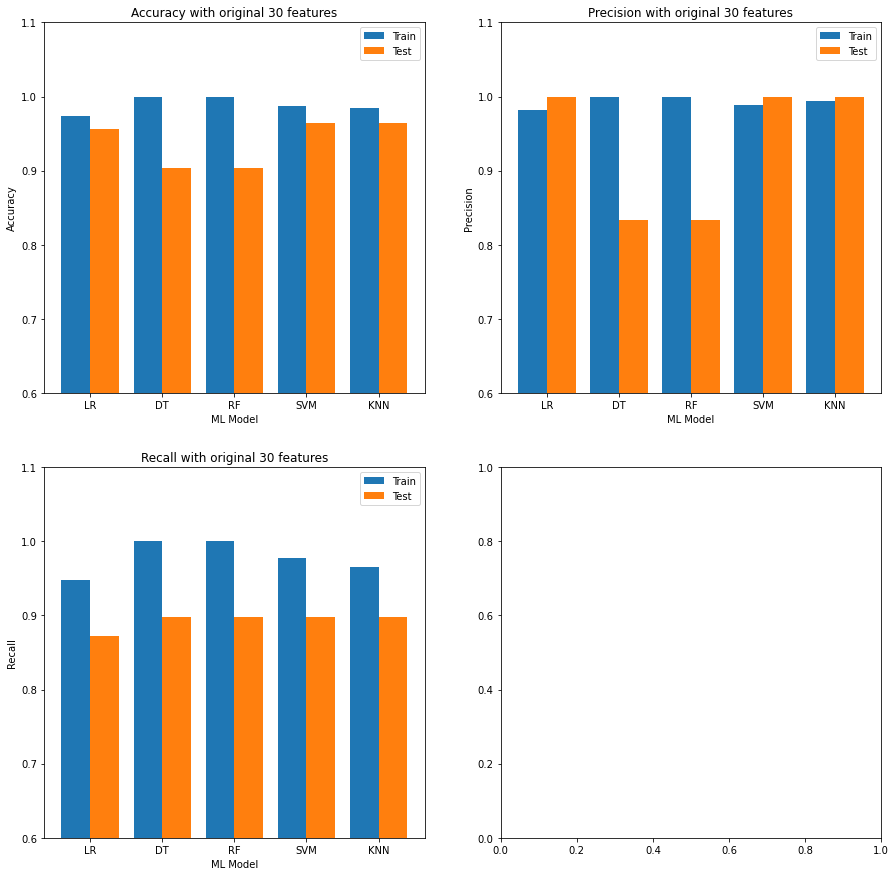

In [27]:
# ACUURACY FOR ORIGINAL FEATURES
X = ['LR', 'DT', 'RF', 'SVM', 'KNN']
acc_train = [
    lr_train_metrics[0],
    dt_train_metrics[0],
    rf_train_metrics[0],
    svm_train_metrics[0],
    knn_train_metrics[0],
]
acc_test = [
    lr_test_metrics[0],
    dt_test_metrics[0],
    rf_test_metrics[0],
    svm_test_metrics[0],
    knn_test_metrics[0],
]
  
X_axis = np.arange(len(X))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

ax[0][0].bar(X_axis - 0.2, acc_train, 0.4, label = 'Train')
ax[0][0].bar(X_axis + 0.2, acc_test, 0.4, label = 'Test')
  
ax[0][0].set_xticks(X_axis, X)
ax[0][0].set_xlabel("ML Model")
ax[0][0].set_ylabel("Accuracy")
ax[0][0].set_title("Accuracy with original 30 features")
ax[0][0].legend()
ax[0][0].set_ylim(0.6, 1.1)

#PRECISION FOR ORIGINAL FEATURES
X = ['LR', 'DT', 'RF', 'SVM', 'KNN']
p_train = [
    lr_train_metrics[1],
    dt_train_metrics[1],
    rf_train_metrics[1],
    svm_train_metrics[1],
    knn_train_metrics[1],
]
p_test = [
    lr_test_metrics[1],
    dt_test_metrics[1],
    rf_test_metrics[1],
    svm_test_metrics[1],
    knn_test_metrics[1],
]
  
X_axis = np.arange(len(X))

ax[0][1].bar(X_axis - 0.2, p_train, 0.4, label = 'Train')
ax[0][1].bar(X_axis + 0.2, p_test, 0.4, label = 'Test')
  
ax[0][1].set_xticks(X_axis, X)
ax[0][1].set_xlabel("ML Model")
ax[0][1].set_ylabel("Precision")
ax[0][1].set_title("Precision with original 30 features")
ax[0][1].legend()
ax[0][1].set_ylim(0.6, 1.1)


#RECALL FOR ORIGINAL FEATURES
X = ['LR', 'DT', 'RF', 'SVM', 'KNN']
r_train = [
    lr_train_metrics[2],
    dt_train_metrics[2],
    rf_train_metrics[2],
    svm_train_metrics[2],
    knn_train_metrics[2],
]
r_test = [
    lr_test_metrics[2],
    dt_test_metrics[2],
    rf_test_metrics[2],
    svm_test_metrics[2],
    knn_test_metrics[2],
]
  
X_axis = np.arange(len(X))

ax[1][0].bar(X_axis - 0.2, r_train, 0.4, label = 'Train')
ax[1][0].bar(X_axis + 0.2, r_test, 0.4, label = 'Test')
  
ax[1][0].set_xticks(X_axis, X)
ax[1][0].set_xlabel("ML Model")
ax[1][0].set_ylabel("Recall")
ax[1][0].set_title("Recall with original 30 features")
ax[1][0].legend()
ax[1][0].set_ylim(0.6, 1.1)

plt.show()

## Prepare PCA data

In [7]:
pca_train_features, pca_test_features = prep_pca_data(train_features, test_features)

## Training ML models with PCA - Top 5 

In [30]:
train_features = pca_train_features[:, :5]
test_features = pca_test_features[:, :5]

lr_train_metrics_5, lr_test_metrics_5 = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics_5, dt_test_metrics_5 = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics_5, rf_test_metrics_5 = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics_5, svm_test_metrics_5 = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics_5, knn_test_metrics_5 = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train metrics_5: Acc={lr_train_metrics_5[0]}, P={lr_train_metrics_5[1]}, R={lr_train_metrics_5[2]}')
print(f'Test metrics_5: Acc={lr_test_metrics_5[0]}, P={lr_test_metrics_5[1]}, R={lr_test_metrics_5[2]}')

print(f'\nDecision Tree:')
print(f'Train metrics_5: Acc={dt_train_metrics_5[0]}, P={dt_train_metrics_5[1]}, R={dt_train_metrics_5[2]}')
print(f'Test metrics_5: Acc={dt_test_metrics_5[0]}, P={dt_test_metrics_5[1]}, R={dt_test_metrics_5[2]}')

print(f'\nRandom Forest:')
print(f'Train metrics_5: Acc={rf_train_metrics_5[0]}, P={rf_train_metrics_5[1]}, R={rf_train_metrics_5[2]}')
print(f'Test metrics_5: Acc={rf_test_metrics_5[0]}, P={rf_test_metrics_5[1]}, R={rf_test_metrics_5[2]}')

print(f'\nSVM:')
print(f'Train metrics_5: Acc={svm_train_metrics_5[0]}, P={svm_train_metrics_5[1]}, R={svm_train_metrics_5[2]}')
print(f'Test metrics_5: Acc={svm_test_metrics_5[0]}, P={svm_test_metrics_5[1]}, R={svm_test_metrics_5[2]}')

print(f'\nKNN:')
print(f'Train metrics_5: Acc={knn_train_metrics_5[0]}, P={knn_train_metrics_5[1]}, R={knn_train_metrics_5[2]}')
print(f'Test metrics_5: Acc={knn_test_metrics_5[0]}, P={knn_test_metrics_5[1]}, R={knn_test_metrics_5[2]}')

Logistic Regression:
Train metrics_5: Acc=0.9692307692307692, P=0.9818181818181818, R=0.9364161849710982
Test metrics_5: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train metrics_5: Acc=1.0, P=1.0, R=1.0
Test metrics_5: Acc=0.8947368421052632, P=0.813953488372093, R=0.8974358974358975

Random Forest:
Train metrics_5: Acc=1.0, P=1.0, R=1.0
Test metrics_5: Acc=0.9385964912280702, P=0.9210526315789473, R=0.8974358974358975

SVM:
Train metrics_5: Acc=0.9802197802197802, P=0.9767441860465116, R=0.9710982658959537
Test metrics_5: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975

KNN:
Train metrics_5: Acc=0.9824175824175824, P=0.9881656804733728, R=0.9653179190751445
Test metrics_5: Acc=0.9473684210526315, P=0.9714285714285714, R=0.8717948717948718


## Training ML models with PCA - Top 10 features

In [31]:
train_features = pca_train_features[:, :10]
test_features = pca_test_features[:, :10]

lr_train_metrics_10, lr_test_metrics_10 = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics_10, dt_test_metrics_10 = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics_10, rf_test_metrics_10 = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics_10, svm_test_metrics_10 = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics_10, knn_test_metrics_10 = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train metrics_10: Acc={lr_train_metrics_10[0]}, P={lr_train_metrics_10[1]}, R={lr_train_metrics_10[2]}')
print(f'Test metrics_10: Acc={lr_test_metrics_10[0]}, P={lr_test_metrics_10[1]}, R={lr_test_metrics_10[2]}')

print(f'\nDecision Tree:')
print(f'Train metrics_10: Acc={dt_train_metrics_10[0]}, P={dt_train_metrics_10[1]}, R={dt_train_metrics_10[2]}')
print(f'Test metrics_10: Acc={dt_test_metrics_10[0]}, P={dt_test_metrics_10[1]}, R={dt_test_metrics_10[2]}')

print(f'\nRandom Forest:')
print(f'Train metrics_10: Acc={rf_train_metrics_10[0]}, P={rf_train_metrics_10[1]}, R={rf_train_metrics_10[2]}')
print(f'Test metrics_10: Acc={rf_test_metrics_10[0]}, P={rf_test_metrics_10[1]}, R={rf_test_metrics_10[2]}')

print(f'\nSVM:')
print(f'Train metrics_10: Acc={svm_train_metrics_10[0]}, P={svm_train_metrics_10[1]}, R={svm_train_metrics_10[2]}')
print(f'Test metrics_10: Acc={svm_test_metrics_10[0]}, P={svm_test_metrics_10[1]}, R={svm_test_metrics_10[2]}')

print(f'\nKNN:')
print(f'Train metrics_10: Acc={knn_train_metrics_10[0]}, P={knn_train_metrics_10[1]}, R={knn_train_metrics_10[2]}')
print(f'Test metrics_10: Acc={knn_test_metrics_10[0]}, P={knn_test_metrics_10[1]}, R={knn_test_metrics_10[2]}')

Logistic Regression:
Train metrics_10: Acc=0.9714285714285714, P=0.9878048780487805, R=0.9364161849710982
Test metrics_10: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train metrics_10: Acc=1.0, P=1.0, R=1.0
Test metrics_10: Acc=0.8947368421052632, P=0.813953488372093, R=0.8974358974358975

Random Forest:
Train metrics_10: Acc=1.0, P=1.0, R=1.0
Test metrics_10: Acc=0.9210526315789473, P=0.8947368421052632, R=0.8717948717948718

SVM:
Train metrics_10: Acc=0.9846153846153847, P=0.9825581395348837, R=0.976878612716763
Test metrics_10: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975

KNN:
Train metrics_10: Acc=0.9868131868131869, P=0.9940828402366864, R=0.9710982658959537
Test metrics_10: Acc=0.956140350877193, P=1.0, R=0.8717948717948718


## Training ML models with PCA - Top 15 features

In [32]:
train_features = pca_train_features[:, :15]
test_features = pca_test_features[:, :15]

lr_train_metrics_15, lr_test_metrics_15 = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics_15, dt_test_metrics_15 = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics_15, rf_test_metrics_15 = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics_15, svm_test_metrics_15 = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics_15, knn_test_metrics_15 = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train metrics_15: Acc={lr_train_metrics_15[0]}, P={lr_train_metrics_15[1]}, R={lr_train_metrics_15[2]}')
print(f'Test metrics_15: Acc={lr_test_metrics_15[0]}, P={lr_test_metrics_15[1]}, R={lr_test_metrics_15[2]}')

print(f'\nDecision Tree:')
print(f'Train metrics_15: Acc={dt_train_metrics_15[0]}, P={dt_train_metrics_15[1]}, R={dt_train_metrics_15[2]}')
print(f'Test metrics_15: Acc={dt_test_metrics_15[0]}, P={dt_test_metrics_15[1]}, R={dt_test_metrics_15[2]}')

print(f'\nRandom Forest:')
print(f'Train metrics_15: Acc={rf_train_metrics_15[0]}, P={rf_train_metrics_15[1]}, R={rf_train_metrics_15[2]}')
print(f'Test metrics_15: Acc={rf_test_metrics_15[0]}, P={rf_test_metrics_15[1]}, R={rf_test_metrics_15[2]}')

print(f'\nSVM:')
print(f'Train metrics_15: Acc={svm_train_metrics_15[0]}, P={svm_train_metrics_15[1]}, R={svm_train_metrics_15[2]}')
print(f'Test metrics_15: Acc={svm_test_metrics_15[0]}, P={svm_test_metrics_15[1]}, R={svm_test_metrics_15[2]}')

print(f'\nKNN:')
print(f'Train metrics_15: Acc={knn_train_metrics_15[0]}, P={knn_train_metrics_15[1]}, R={knn_train_metrics_15[2]}')
print(f'Test metrics_15: Acc={knn_test_metrics_15[0]}, P={knn_test_metrics_15[1]}, R={knn_test_metrics_15[2]}')

Logistic Regression:
Train metrics_15: Acc=0.9714285714285714, P=0.9819277108433735, R=0.9421965317919075
Test metrics_15: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train metrics_15: Acc=1.0, P=1.0, R=1.0
Test metrics_15: Acc=0.8859649122807017, P=0.8095238095238095, R=0.8717948717948718

Random Forest:
Train metrics_15: Acc=1.0, P=1.0, R=1.0
Test metrics_15: Acc=0.9035087719298246, P=0.8333333333333334, R=0.8974358974358975

SVM:
Train metrics_15: Acc=0.9868131868131869, P=0.9883040935672515, R=0.976878612716763
Test metrics_15: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975

KNN:
Train metrics_15: Acc=0.9846153846153847, P=0.9940476190476191, R=0.9653179190751445
Test metrics_15: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975


## Training ML models with PCA - Top 20 features

In [33]:
train_features = pca_train_features[:, :20]
test_features = pca_test_features[:, :20]

lr_train_metrics_20, lr_test_metrics_20 = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics_20, dt_test_metrics_20 = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics_20, rf_test_metrics_20 = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics_20, svm_test_metrics_20 = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics_20, knn_test_metrics_20 = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train metrics_20: Acc={lr_train_metrics_20[0]}, P={lr_train_metrics_20[1]}, R={lr_train_metrics_20[2]}')
print(f'Test metrics_20: Acc={lr_test_metrics_20[0]}, P={lr_test_metrics_20[1]}, R={lr_test_metrics_20[2]}')

print(f'\nDecision Tree:')
print(f'Train metrics_20: Acc={dt_train_metrics_20[0]}, P={dt_train_metrics_20[1]}, R={dt_train_metrics_20[2]}')
print(f'Test metrics_20: Acc={dt_test_metrics_20[0]}, P={dt_test_metrics_20[1]}, R={dt_test_metrics_20[2]}')

print(f'\nRandom Forest:')
print(f'Train metrics_20: Acc={rf_train_metrics_20[0]}, P={rf_train_metrics_20[1]}, R={rf_train_metrics_20[2]}')
print(f'Test metrics_20: Acc={rf_test_metrics_20[0]}, P={rf_test_metrics_20[1]}, R={rf_test_metrics_20[2]}')

print(f'\nSVM:')
print(f'Train metrics_20: Acc={svm_train_metrics_20[0]}, P={svm_train_metrics_20[1]}, R={svm_train_metrics_20[2]}')
print(f'Test metrics_20: Acc={svm_test_metrics_20[0]}, P={svm_test_metrics_20[1]}, R={svm_test_metrics_20[2]}')

print(f'\nKNN:')
print(f'Train metrics_20: Acc={knn_train_metrics_20[0]}, P={knn_train_metrics_20[1]}, R={knn_train_metrics_20[2]}')
print(f'Test metrics_20: Acc={knn_test_metrics_20[0]}, P={knn_test_metrics_20[1]}, R={knn_test_metrics_20[2]}')

Logistic Regression:
Train metrics_20: Acc=0.9736263736263736, P=0.9820359281437125, R=0.9479768786127167
Test metrics_20: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train metrics_20: Acc=1.0, P=1.0, R=1.0
Test metrics_20: Acc=0.9035087719298246, P=0.8333333333333334, R=0.8974358974358975

Random Forest:
Train metrics_20: Acc=1.0, P=1.0, R=1.0
Test metrics_20: Acc=0.9035087719298246, P=0.8333333333333334, R=0.8974358974358975

SVM:
Train metrics_20: Acc=0.9868131868131869, P=0.9883040935672515, R=0.976878612716763
Test metrics_20: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975

KNN:
Train metrics_20: Acc=0.9846153846153847, P=0.9940476190476191, R=0.9653179190751445
Test metrics_20: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975


## Training ML models with PCA - All 30 features

In [34]:
train_features = pca_train_features[:, :]
test_features = pca_test_features[:, :]

lr_train_metrics_30, lr_test_metrics_30 = classify_logistic_reg(train_features, 
                                                          train_labels, 
                                                          test_features, 
                                                          test_labels)

dt_train_metrics_30, dt_test_metrics_30 = classify_decision_tree(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

rf_train_metrics_30, rf_test_metrics_30 = classify_random_forest(train_features, 
                                                           train_labels, 
                                                           test_features, 
                                                           test_labels)

svm_train_metrics_30, svm_test_metrics_30 = classify_svm(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

knn_train_metrics_30, knn_test_metrics_30 = classify_knn(train_features, 
                                                   train_labels, 
                                                   test_features, 
                                                   test_labels)

print(f'Logistic Regression:')
print(f'Train metrics_30: Acc={lr_train_metrics_30[0]}, P={lr_train_metrics_30[1]}, R={lr_train_metrics_30[2]}')
print(f'Test metrics_30: Acc={lr_test_metrics_30[0]}, P={lr_test_metrics_30[1]}, R={lr_test_metrics_30[2]}')

print(f'\nDecision Tree:')
print(f'Train metrics_30: Acc={dt_train_metrics_30[0]}, P={dt_train_metrics_30[1]}, R={dt_train_metrics_30[2]}')
print(f'Test metrics_30: Acc={dt_test_metrics_30[0]}, P={dt_test_metrics_30[1]}, R={dt_test_metrics_30[2]}')

print(f'\nRandom Forest:')
print(f'Train metrics_30: Acc={rf_train_metrics_30[0]}, P={rf_train_metrics_30[1]}, R={rf_train_metrics_30[2]}')
print(f'Test metrics_30: Acc={rf_test_metrics_30[0]}, P={rf_test_metrics_30[1]}, R={rf_test_metrics_30[2]}')

print(f'\nSVM:')
print(f'Train metrics_30: Acc={svm_train_metrics_30[0]}, P={svm_train_metrics_30[1]}, R={svm_train_metrics_30[2]}')
print(f'Test metrics_30: Acc={svm_test_metrics_30[0]}, P={svm_test_metrics_30[1]}, R={svm_test_metrics_30[2]}')

print(f'\nKNN:')
print(f'Train metrics_30: Acc={knn_train_metrics_30[0]}, P={knn_train_metrics_30[1]}, R={knn_train_metrics_30[2]}')
print(f'Test metrics_30: Acc={knn_test_metrics_30[0]}, P={knn_test_metrics_30[1]}, R={knn_test_metrics_30[2]}')

Logistic Regression:
Train metrics_30: Acc=0.9736263736263736, P=0.9820359281437125, R=0.9479768786127167
Test metrics_30: Acc=0.956140350877193, P=1.0, R=0.8717948717948718

Decision Tree:
Train metrics_30: Acc=1.0, P=1.0, R=1.0
Test metrics_30: Acc=0.8596491228070176, P=0.7446808510638298, R=0.8974358974358975

Random Forest:
Train metrics_30: Acc=1.0, P=1.0, R=1.0
Test metrics_30: Acc=0.9035087719298246, P=0.8333333333333334, R=0.8974358974358975

SVM:
Train metrics_30: Acc=0.9846153846153847, P=0.9825581395348837, R=0.976878612716763
Test metrics_30: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975

KNN:
Train metrics_30: Acc=0.9846153846153847, P=0.9940476190476191, R=0.9653179190751445
Test metrics_30: Acc=0.9649122807017544, P=1.0, R=0.8974358974358975


## Analysis and Conclusion

Below is a plot for Recall scores after running ML models on the PCA test data. 
- According to the plot, the models' performances do not improve as we increase the number of features from 5 to 30. 
- Except KNN which stops increasing after 15.
- This means that just top 5 (15 for KNN) PCA features are needed to achieve the best possible performance. 
- However, the best model under PCA still doesn't perform as well as the best model with the 30 original features (SVM - 92.3%).
- Except logistic regression, all have the same recall score. This shows that the PCA features themselves are not that great as compared to the original features.

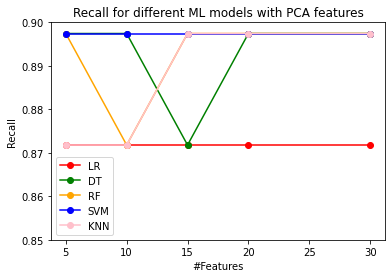

In [46]:
x = np.array([5, 10, 15, 20, 30])
lr_recall = [
    lr_test_metrics_5[2],
    lr_test_metrics_10[2],
    lr_test_metrics_15[2],
    lr_test_metrics_20[2],
    lr_test_metrics_30[2],
]
dt_recall = [
    dt_test_metrics_5[2],
    dt_test_metrics_10[2],
    dt_test_metrics_15[2],
    dt_test_metrics_20[2],
    dt_test_metrics_30[2],
]
rf_recall = [
    rf_test_metrics_5[2],
    rf_test_metrics_10[2],
    rf_test_metrics_15[2],
    rf_test_metrics_20[2],
    rf_test_metrics_30[2],
]
knn_recall = [
    knn_test_metrics_5[2],
    knn_test_metrics_10[2],
    knn_test_metrics_15[2],
    knn_test_metrics_20[2],
    knn_test_metrics_30[2],
]
svm_recall = [
    svm_test_metrics_5[2],
    svm_test_metrics_10[2],
    svm_test_metrics_15[2],
    svm_test_metrics_20[2],
    svm_test_metrics_30[2],
]
X_axis = np.arange(len(X))
  
# first plot with X and Y data
plt.plot(x, lr_recall, 'o-', c='red', label='LR')
plt.plot(x, dt_recall, 'o-', c='green', label='DT')
plt.plot(x, rf_recall, 'o-', c='orange', label='RF')
plt.plot(x, svm_recall, 'o-', c='blue', label='SVM')
plt.plot(x, knn_recall, 'o-', c='pink', label='KNN')
  
  
plt.xlabel("#Features")
plt.ylabel("Recall")
plt.title('Recall for different ML models with PCA features')
plt.legend()
plt.ylim(0.85, 0.9)
plt.show()